# Rigid rents

Startup run in 5.871798992156982 secs.


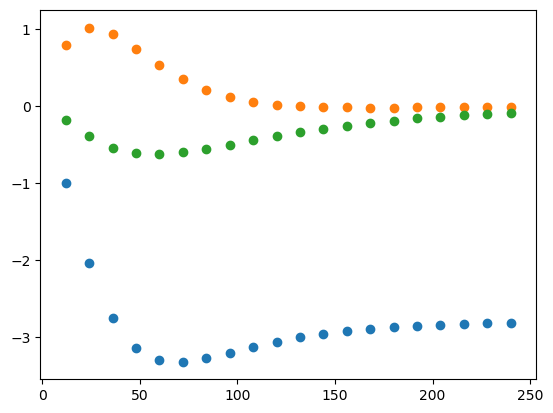

false

In [1]:
using NBInclude
_VERS_ = :rigidrent
@nbinclude("startup.ipynb")

dir_gra = joinpath(pwd(),"../graphs/rigidrent")
_tosave = false

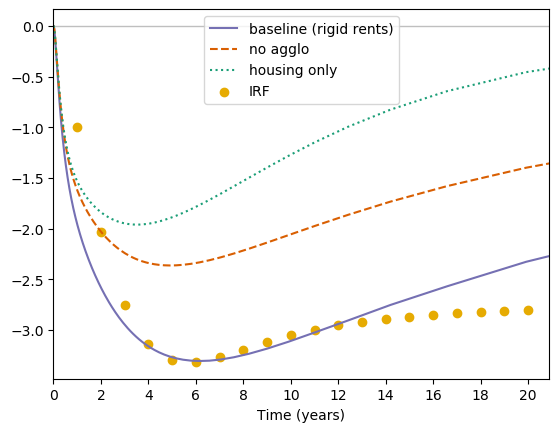

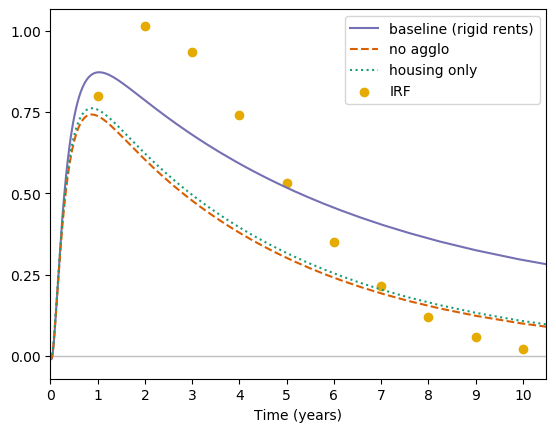

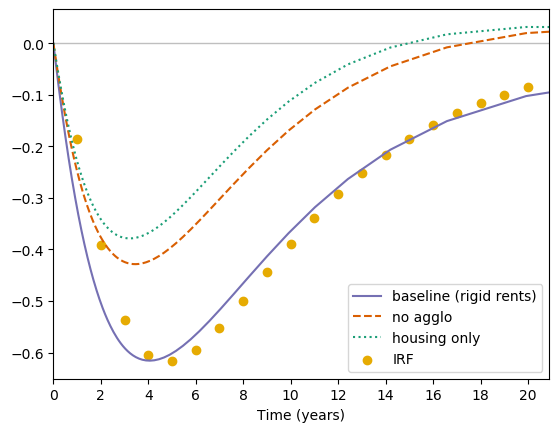

()

In [2]:
p_noagglo = StrucPar_agglo(0,0,0,0,0,0,p)
p_housing = StrucPar_agglo(p.eHd,0,0,0,0,0,p)

tab =[]
for myp in [p, p_noagglo, p_housing]
    mysimu = simulate(240, simpar, myp)
    push!(tab, (myp,mysimu))
end

mylabel = ["baseline (rigid rents)", "no agglo", "housing only"]

### employment
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
xmom = 1:20
scatter(xmom,simpar.data.emp[xmom], c=myorange, label="IRF")
i=1
for (myp,mysimu) in tab
    plot(mysimu.t ./ 12, (mysimu.m ./myp.m_star .- 1) .* 100 , 
             c=colorvec[i], linestyle=lsvec[i], label=mylabel[i])
    i +=1
end
xlabel("Time (years)")
ax = gca()
legend()
ax.set(xlim=(0,20.9))
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(0.5) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"employment.png")) : ()



### unemployment rate
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
xmom = 1:20
scatter(xmom, simpar.data.urate[xmom], c=myorange, label="IRF")
i=1
for (myp,mysimu) in tab
    plot(mysimu.t ./ 12, (mysimu.urate .- ((myp.l_star-myp.m_star)/(myp.l_star)) ) .* 100 , 
        c=colorvec[i], linestyle=lsvec[i], label=mylabel[i])
    i +=1
end
xlabel("Time (years)")
ax = gca()
ax.set(xlim=(0,10.5))
legend()
Mx = matplotlib.ticker.MultipleLocator(1) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(0.25) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"urate.png")) : ()


### participation rate
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
xmom = 1:20
scatter(xmom, simpar.data.prate[xmom], c=myorange, label="IRF")
i=1
for (myp,mysimu) in tab
    plot(mysimu.t ./ 12, (mysimu.prate .- (myp.l_star/myp.d_star) ) .* 100 , 
        c=colorvec[i], linestyle=lsvec[i], label=mylabel[i])
    i +=1
end
xlabel("Time (years)")
ax = gca()
ax.set(xlim=(0,20.9))
legend()
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(0.1) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"prate.png")) : ()